# 非程式題

1. 如果 Agent 沒有 planning 能力會有什麼缺點？

2. planning 在實務應用上會碰到什麼困難？

# 程式題

In [ ]:
!pip install --quiet -U langgraph langchain-openai langchain-community tavily-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.4/70.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.2/440.2 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 9.0 MB/s eta 0:00:00


## 將下列的小工具加進你的 plan-and-execute agent 裡面，使得輸出類似的結果

> 小小 hint：tutorial 照摳就好好🙂，或是大家可以自己寫一些 function 或是找一些外部 api 工具，玩一下看看有什麼新花樣

In [ ]:
import requests
import pandas as pd
from langchain_core.tools import tool

@tool
def getMainBuyAndSale() :
  """台積電股價及其他相關資訊"""
  url = f'https://pchome.megatime.com.tw/stock/sto1/ock4/sid' + '2330' + '.html'
  payloads = {'is_check': '1'}
  resp = requests.request(method='POST', url=url, data=payloads)
  data = pd.read_html(resp.text)

  return data

In [ ]:
import os
from google.colab import userdata

# os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')
# os.environ["TAVILY_API_KEY"] = userdata.get('TAVILY_API_KEY')

In [ ]:
from langchain_core.tools import tool
import datetime
from langchain_community.tools.tavily_search import TavilySearchResults

@tool
def get_current_date() -> str:
    """取得現在的日期，格式為 YYYY-MM-DD"""
    return datetime.datetime.now().strftime("%Y-%m-%d")

tools = [
    TavilySearchResults(max_results=3),
    get_current_date,
    getMainBuyAndSale
    ]

/tmp/ipython-input-4-598696710.py:11: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  TavilySearchResults(max_results=3),


In [ ]:
from langchain_openai import ChatOpenAI
from langgraph.prebuilt import create_react_agent

# Choose the LLM that will drive the agent
llm = ChatOpenAI(
    model="gpt-4o-mini-2024-07-18",
    temperature=0
    )

prompt = "你是一個專業等級的任務執行器，用來完美執行任務計劃。"
agent_executor = create_react_agent(
    llm,
    tools,
    prompt=prompt,
    # debug=True
    )

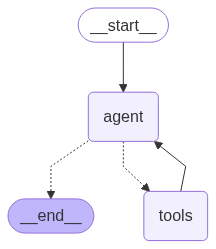

In [ ]:
from IPython.display import Image, display

display(Image(agent_executor.get_graph(xray=True).draw_mermaid_png()))

In [ ]:
agent_executor.invoke({"messages": [("user", "今天幾號？")]})

{'messages': [HumanMessage(content='今天幾號？', additional_kwargs={}, response_metadata={}, id='b2ff88ee-ae2d-4df0-842e-b5eeae27df59'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_kVsWr0PESrDMybqb97dup2Ja', 'function': {'arguments': '{}', 'name': 'get_current_date'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 153, 'total_tokens': 164, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', 'id': 'chatcmpl-BoiN7kRhPgkkwNVRXTbZ5Ttb5jIU4', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--320cf8cc-cbe5-4716-9f2b-ce550b36aade-0', tool_calls=[{'name': 'get_current_date', 'args': {}, 'id': 'call_kVsWr0PESrDMybqb97dup2Ja', 'type': 'tool_

In [ ]:
import operator
from typing import Annotated, List, Tuple
from typing_extensions import TypedDict


class PlanExecute(TypedDict):
    input: str
    plan: List[str] # 待執行的步驟
    past_steps: Annotated[List[Tuple], operator.add] # 執行步驟後的結果
    response: str # 最終的問題回覆結果

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from pydantic import BaseModel, Field

class Plan(BaseModel):
    """未來要遵循的計劃"""

    steps: List[str] = Field(description="不同的步驟，應按順序排列")

planner_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            """
            你是一個專業等級的任務規劃器。
            請根據指定目標，擬定一份簡潔的逐步執行計畫。
            此計畫應包含一系列獨立的任務，每個任務若正確執行，將逐步導向正確的答案。
            請避免加入任何多餘的步驟。
            最終步驟的執行結果即為最終答案。
            請確保每個步驟皆包含完成所需的所有資訊，不得跳過任何必要步驟。
            """,
        ),
        ("placeholder", "{messages}"),
    ]
)

In [ ]:
planner = planner_prompt | ChatOpenAI(
    model="gpt-4.1-2025-04-14",
    temperature=0
).with_structured_output(Plan)

In [20]:
planner.invoke(
    {
        "messages": [
            ("user", "明天適合進場台積電嗎?")
        ]
    }
)

Plan(steps=['查詢台積電（2330）最新收盤價及今日盤後消息。', '分析台積電近期技術線型（如均線、支撐壓力、成交量等）。', '查閱近期台積電相關基本面消息（如財報、產業新聞、法說會資訊）。', '檢視大盤（加權指數）及半導體產業整體趨勢。', '評估自身投資目標、風險承受度及資金配置。', '根據上述分析，判斷明天是否適合進場台積電。'])

In [21]:
from typing import Union


class Response(BaseModel):
    """回應使用者的內容"""

    response: str


class Act(BaseModel):
    """要執行的動作"""

    action: Union[Response, Plan] = Field(
        description="要執行的動作： 若要回應使用者，請使用'Response'。"
        "若需進一步使用工具以取得答案，請使用'Plan'。"
    )

replanner_prompt = ChatPromptTemplate.from_template(
    """
    你是一個專業等級的任務規劃器。
    請根據指定目標，擬定一份簡潔的逐步執行計畫。
    此計畫應包含一系列獨立的任務，每個任務若正確執行，將逐步導向正確的答案。
    請避免加入任何多餘的步驟。
    最終步驟的執行結果即為最終答案。
    請確保每個步驟皆包含完成所需的所有資訊，不得跳過任何必要步驟。

    本次任務的目標為：
    {input}

    你原先擬定的計畫為：
    {plan}

    目前已執行的步驟如下：
    {past_steps}

    請根據目前進度，調整後續的執行計畫。
    若已無需進一步步驟，並可直接回應使用者，請進行回應；
    若仍需執行工具或任務取得答案，請補足剩餘計畫。
    請僅列出尚未完成且仍需執行的步驟，勿重複列出已執行的部分。
    """
)

In [22]:
replanner = replanner_prompt | ChatOpenAI(
    model="gpt-4.1-2025-04-14",
    temperature=0
).with_structured_output(Act)

In [23]:
from langgraph.graph import END


# 執行計劃中的第一個步驟
async def execute_step(state: PlanExecute):
    plan = state["plan"]
    # 將所有步驟編號整理成文字（用於提示）
    plan_str = "\n".join(f"{i+1}. {step}" for i, step in enumerate(plan))
    task = plan[0] # 抓出第一個尚未執行的步驟
    task_formatted = f"""針對以下計劃：{plan_str}\n\n你的任務是執行 step {1}, {task}."""

    # 呼叫執行器執行該步驟
    agent_response = await agent_executor.ainvoke(
        {"messages": [("user", task_formatted)]}
    )

    # 回傳本次執行結果（步驟與回應）
    return {
        "past_steps": [(task, agent_response["messages"][-1].content)],
    }

# 初始規劃流程
async def plan_step(state: PlanExecute):
    plan = await planner.ainvoke({"messages": [("user", state["input"])]})
    return {"plan": plan.steps}

# 根據已完成的步驟與整體輸入，更新後續步驟或直接產生答案。
async def replan_step(state: PlanExecute):
    output = await replanner.ainvoke(state)

    # 若模型決定可以直接回覆使用者（任務結束），則回傳結果
    if isinstance(output.action, Response):
        return {"response": output.action.response}
    else:
        # 否則更新剩餘計劃
        return {"plan": output.action.steps}

# 檢查是否已經產生最終回應，決定是否結束流程
def should_end(state: PlanExecute):
    if "response" in state and state["response"]:
        return END
    else:
        return "executor"

In [24]:
from langgraph.graph import StateGraph, START

graph_builder = StateGraph(PlanExecute)

graph_builder.add_node("planner", plan_step) # 新增規劃器節點
graph_builder.add_node("executor", execute_step) # 新增執行器節點
graph_builder.add_node("replanner", replan_step) # 新增重新規劃器節點

graph_builder.add_edge(START, "planner")
graph_builder.add_edge("planner", "executor") # 將規劃器與執行器連接
graph_builder.add_edge("executor", "replanner") # 將執行器與重新規劃器連接

graph_builder.add_conditional_edges(
    "replanner",
    should_end,
    ["executor", END],
)

graph = graph_builder.compile()

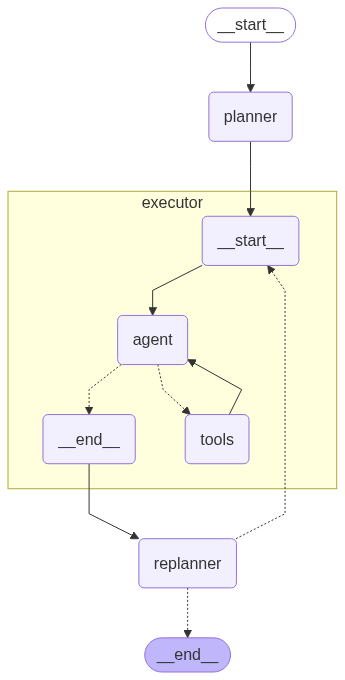

In [25]:
from IPython.display import Image, display

display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

In [26]:
from langchain_core.callbacks.base import BaseCallbackHandler

class PrintToolNameHandler(BaseCallbackHandler):
    def on_tool_start(self, serialized_tool: dict, input_str, **kwargs):
        tool_name = serialized_tool.get("name", "<unknown>")
        print(f"[Tool name] {tool_name}")

In [27]:
config = {"recursion_limit": 50,
          "callbacks":[PrintToolNameHandler()]}
inputs = {"input": "明天適合進場台積電嗎?"}

async for event in graph.astream(inputs, config=config):
    for k, v in event.items():
        if k != "__end__":
            for step in v.keys():
              if step == "plan":
                print(f"[{step}]")
                for idx, action in enumerate(v[step]):
                  print(f"{idx+1}. {action}")

              elif step == "past_steps":
                print(f"[{step}]")
                for action in v[step][0]:
                  print(action)

              else:
                print(f"[{step}]")
                print(v[step])
    print('\n')

[plan]
1. 查詢台積電(TSMC)最新的股價與技術指標（如K線、均線、成交量等）。
2. 分析台積電近期的財報、產業消息與市場情緒。
3. 檢視大盤（如台灣加權指數）及半導體產業整體走勢。
4. 評估自身投資目標、風險承受度與資金配置狀況。
5. 根據上述分析，判斷明天是否適合進場台積電。


[Tool name] getMainBuyAndSale


/tmp/ipython-input-2-938373103.py:11: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data = pd.read_html(resp.text)


[past_steps]
查詢台積電(TSMC)最新的股價與技術指標（如K線、均線、成交量等）。
以下是台積電（TSMC）的最新股價與技術指標資訊：

- **最新股價**：
  - 開盤價：1075.0
  - 最高價：1085.0
  - 最低價：1070.0
  - 昨收價：1085.0

- **成交量**：
  - 成交張數：23674

- **買賣資訊**：
  - 買價：1080.0
  - 買量：153
  - 賣價：1085.0
  - 賣量：2395

- **主力進出**：
  - 買超券商：
    - 美商高盛：買進5963張，賣出1186張，買進均價360.15，賣出均價1082.83
    - 摩根士丹利：買進9032張，賣出5273張，買進均價237.77，賣出均價407.26
    - 美林證券：買進4567張，賣出1673張，買進均價470.19，賣出均價1084.22
    - 其他券商亦有買進與賣出數據。

這些數據顯示了台積電的當前市場狀況，接下來可以進行更深入的分析。


[plan]
1. 分析台積電近期的財報、產業消息與市場情緒。
2. 檢視大盤（如台灣加權指數）及半導體產業整體走勢。
3. 評估自身投資目標、風險承受度與資金配置狀況。
4. 根據上述分析，判斷明天是否適合進場台積電。


[Tool name] tavily_search_results_json[Tool name] tavily_search_results_json
[Tool name] tavily_search_results_json

[past_steps]
分析台積電近期的財報、產業消息與市場情緒。
### 台積電近期財報、產業消息與市場情緒分析

#### 1. 近期財報
- **財報概況**: 台積電（TSMC）在2025年5月的月營收達到320,515,951千元，年增39.59%。這顯示出公司在營收上持續增長，並且在過去15個月中持續成長。
- **每股收益**: 預計2025年第一季每股收益為2.12美元，營收預測為839.25億美元，顯示出穩定的盈利能力。
- **財務比率**: 台積電的毛利率和淨利率在過去幾個月中保持在高位，顯示出其在成本控制和市場需求方面的優勢。

#### 2. 產業消息
- **合作與

/tmp/ipython-input-2-938373103.py:11: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data = pd.read_html(resp.text)


[past_steps]
根據上述所有分析與個人條件，判斷明天是否適合進場台積電，並給出明確建議。
根據目前的台積電股價及交易資訊，以下是對於明天是否適合進場的分析與建議：

### 當前股價資訊
- **台積電最新股價**：1085.00
- **最高價**：1085.00
- **最低價**：1070.00
- **買進量**：5963
- **賣出量**：1186
- **買進平均價格**：360.15
- **賣出平均價格**：1082.83

### 市場情況分析
1. **買賣量**：目前的買進量（5963）遠高於賣出量（1186），顯示出市場對於台積電的需求強勁，這可能是進場的好時機。
2. **價格波動**：股價在1085.00附近波動，且最低曾到1070.00，顯示出一定的支撐位。
3. **市場情緒**：從買進量與賣出量的比例來看，市場情緒偏向樂觀，這可能會推動股價上漲。

### 建議
- **進場時機**：如果您對於台積電的長期前景持正面看法，且能接受短期內的價格波動，建議可以考慮在明天進場。
- **風險管理**：建議設置止損點，以防止股價出現意外下跌。可以考慮在1070.00以下設置止損點。
- **持有策略**：若進場後股價上漲至1090.00以上，可以考慮部分獲利了結。

### 結論
綜合以上分析，明天適合進場台積電，但需謹慎操作並設置風險管理措施。


[response]
根據目前已完成的所有步驟，已經綜合考量了台積電的最新股價、技術指標、財報、產業消息、市場情緒、大盤與產業趨勢，以及個人投資目標與風險承受度，並已給出明確的進場建議與風險管理措施。

因此，所有必要步驟皆已完成，無需再執行其他任務。

結論：
若您對台積電長期前景持正面看法，且能接受短期波動，明天適合進場台積電，建議設置止損點（如1070.00以下），並做好風險管理。


